# Week 13 Handson - Clustering
In this hands-on, we will empoy clustering technique to cluster data.

## Read the Dataset

Execute the following code to read the digit mnist dataset. The folder of `digit_mnist` dataset must be in the same directory with this ipynb file.

The dataset contains 500 digit handwritten images from 5 different classes/labels (0, 1, 2, 3, 4). The first 100 images have label of 0, the second 100 images have label of 1, and so on, until the fifth 100 images have label of 4.

In [8]:
# membaca library yang dibutuhkan
import numpy as np #library untuk komputasi matriks
import cv2 #library untuk memproses gambar/video
import matplotlib.pyplot as plt #library untuk plot data (visualisasi)
import os

# fungsi untuk membaca gambar (digit MNIST) ke matriks numpy per folder
def baca_image(folder_image):
    count = 0;
    list_nama_image= os.listdir(folder_image)
    list_path_image = [os.path.join(folder_image, i) for i in list_nama_image]
    all_image = np.ndarray(shape=(0,28*28))
    for i in list_path_image:
        image = cv2.imread(i, 0) #baca image menggunakan OpenCV API dalam gray image (0=gray, 1=berwarna).
        image_reshaped = image.reshape((1, -1))
        all_image = np.concatenate((all_image, image_reshaped), axis=0)
        count = count + 1
        if count >= 100:
            break
    return all_image
        
# menggunakan fungsi yg telah dibuat untuk membaca image MNIST '0' sampai '4' 
for angka in range(5):
    file = "digit_mnist/" + str(angka)
    digit = baca_image(file)
    if angka == 0:
        X = digit
        Y = np.full(len(digit), angka)
    else :
        X = np.concatenate((X, digit), axis=0)
        Y = np.concatenate((Y, np.full(len(digit), angka)), axis=0)

print("X shape: ", X.shape)
print("Y shape: ", Y.shape)
display(X, Y)

X shape:  (500, 784)
Y shape:  (500,)


array([[3., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

## Milestone 01 (M01)
In this milestone, you are asked to empoy clustering method to cluster the digit MNIST read above, into 5 clusters. The output of this milestone is clustered data. You may use any clustering method from any library you want.

In [13]:
#your answer for M01

from sklearn.cluster import MiniBatchKMeans

n_digits = len(np.unique(Y))
print(n_digits)

# Initialize KMeans model
kmeans = MiniBatchKMeans(n_clusters = n_digits)

# Fit the model to the training data
kmeans.fit(X)

kmeans.labels_

5


array([3, 4, 3, 3, 0, 4, 3, 2, 0, 4, 2, 4, 3, 3, 3, 4, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 4, 2, 0, 3, 3, 0, 3,
       4, 4, 3, 2, 3, 4, 3, 3, 3, 3, 2, 0, 3, 3, 3, 3, 3, 0, 3, 3, 2, 3,
       3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 4, 2, 2, 4, 2, 1, 4, 4, 2, 1, 1, 2, 2, 2, 4, 1, 2, 2, 2,
       4, 4, 1, 1, 4, 4, 4, 4, 4, 0, 4, 2, 4, 4, 4, 1, 4, 2, 1, 0, 0, 4,
       4, 1, 4, 1, 4, 2, 4, 4, 4, 4, 1, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 0,
       1, 2, 1, 1, 2, 4, 4, 4, 1, 4, 0, 4, 1, 4, 4, 0, 1, 4, 1, 1, 0, 4,
       4, 4, 2, 4, 4, 2, 4, 0, 4, 4, 4, 2, 0, 4, 2,

## M02
Evaluate the clustering results in M01, as follows.
1. For each cluster, take the dominant class. E.g., in cluster 1, 96% data are digit 3 images, thus, all images in the cluster 1 have class prediction of 3 (digit 3). Likewise for other clusters.
2. With that prediction ouput, evaluate the clustering result using metrics of: (i) accuracy, (ii) precision: $TP/pred. yes$ and recall$: TP/actual yes$ for each class.
3. Print the metrics you get in (2).

In [41]:
#your answer for M02

from sklearn.metrics import classification_report, confusion_matrix

def infer_cluster_labels(kmeans, actual_labels):
    keys = np.unique(actual_labels)
    values = [[] for i in range(len(keys))]
    inferred_labels = dict(zip(keys, values))
    for i in range(kmeans.n_clusters):
        labels = []
        index = np.where(kmeans.labels_ == i)

        labels = np.asarray(actual_labels[index])
#         print(labels)

        counts = np.bincount(labels)
        inferred_labels[np.argmax(counts)].append(i)
        
#         print('Cluster: {}, label: {}\n'.format(i, np.argmax(counts)))

    return inferred_labels

def infer_data_labels(X_labels, cluster_labels):
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)

    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key

    return predicted_labels

# test the infer_cluster_labels() and infer_data_labels() functions
cluster_labels = infer_cluster_labels(kmeans, Y)
X_clusters = kmeans.predict(X)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)

print("\n1. Key is actual labels meanwhile value is k means cluster")
print(cluster_labels)
print()
# print("Shape of predicted labels={} and actual labels={}".format(predicted_labels.shape, Y.shape))

print(classification_report(Y, predicted_labels))

print("Confusion Matrix. x coordinate -> predicted labels. y coordinate -> actual labels")
print(confusion_matrix(Y, predicted_labels))


1. Key is actual labels meanwhile value is k means cluster
{0: [3], 1: [1], 2: [4], 3: [2], 4: [0]}

              precision    recall  f1-score   support

           0       1.00      0.70      0.82       100
           1       0.77      0.98      0.86       100
           2       0.74      0.51      0.60       100
           3       0.73      0.86      0.79       100
           4       0.83      0.95      0.88       100

    accuracy                           0.80       500
   macro avg       0.81      0.80      0.79       500
weighted avg       0.81      0.80      0.79       500

Confusion Matrix. x coordinate -> predicted labels. y coordinate -> actual labels
[[70  0 13 10  7]
 [ 0 98  0  1  1]
 [ 0 19 51 21  9]
 [ 0  6  5 86  3]
 [ 0  5  0  0 95]]


## M03

Suppose you are working for goverment that they want to lauch development program to society. The program is expected to empower the society to improve their welfare. Given sample dataset of `people.csv` (provided in the zip), you are asked to segment the data. The data attibutes are: name, age, marital status, income range, gender, total children, children at home, education, occupation, home owner, cars. You may define your own variables, such as the number of segments, attributes that are used, etc. Please provide your arguments of choosing those variables, and show (or visualize) the segments you create, including at least brief explanation.

In [147]:
#your answer for M03

import pandas as pd

df = pd.read_csv("./people.csv", encoding="ISO-8859-1")

display(df.columns)
display(df)

Index(['Name', 'Age', 'MaritalStatus', 'IncomeRange', 'Gender',
       'TotalChildren', 'ChildrenAtHome', 'Education', 'Occupation',
       'HomeOwner', 'Cars'],
      dtype='object')

,Name,Age,MaritalStatus,IncomeRange,Gender,TotalChildren,ChildrenAtHome,Education,Occupation,HomeOwner,Cars
0,Aaron Adams,42,0,50000,0,0,0,3,2,1,1
1,Aaron Alexander,40,1,50000,0,0,0,2,2,1,2
2,Aaron Allen,63,0,25000,0,2,1,2,1,1,2
3,Aaron Baker,56,1,50000,0,4,2,2,2,1,2
4,Aaron Bryant,72,0,75000,0,4,0,4,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...
18503,Zoe Rogers,50,0,100000,1,0,0,5,2,0,0
18504,Zoe Sanchez,68,0,75000,1,2,1,3,5,1,1
18505,Zoe Sanders,51,1,50000,1,3,3,4,2,1,2
18506,Zoe Torres,60,1,50000,1,2,0,2,2,1,2


# EDA

analysis the data with correlation heatmap and select feature using VarianceThreshold technique, which is suitable for unsupervised learning dataset. The threshold is set to 1, to get arround 50% of initial features

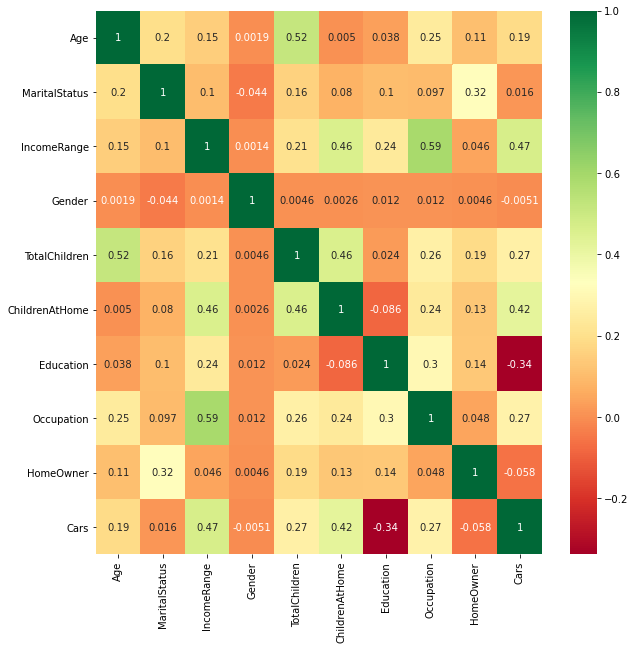

In [148]:
import seaborn as sns

corrmat = df.corr()
top_corr_features = corrmat.index

plt.figure(figsize=(10, 10))
g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [149]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(1)
selector.fit_transform(df.loc[:, df.columns != 'Name'])

selector_index = selector.get_support()
df_selected = df.loc[:, df.columns != 'Name'].iloc[:, selector_index]

display(df_selected)

,Age,IncomeRange,TotalChildren,ChildrenAtHome,Education,Occupation,Cars
0,42,50000,0,0,3,2,1
1,40,50000,0,0,2,2,2
2,63,25000,2,1,2,1,2
3,56,50000,4,2,2,2,2
4,72,75000,4,0,4,4,2
...,...,...,...,...,...,...,...
18503,50,100000,0,0,5,2,0
18504,68,75000,2,1,3,5,1
18505,51,50000,3,3,4,2,2
18506,60,50000,2,0,2,2,2


# Clustering method using MiniBatchKMeans

output is the colors/clusters for each instances of dataset. Number of clusters is set to 5, after the consideration of initial dataset visualization

In [150]:
# Initialize KMeans model
kmeans = MiniBatchKMeans(n_clusters = 5)
colors = ['r', 'b', 'g', 'm', 'y']

# Fit the model to the training data
kmeans.fit_transform(df_selected)

translation = dict.fromkeys(np.unique(kmeans.labels_) , 1)
translation.update((k, colors[i]) for i, k in enumerate(translation))

kmeans_res = np.vectorize(translation.get)(kmeans.labels_)
kmeans_res

array(['b', 'b', 'y', ..., 'b', 'b', 'm'], dtype='<U1')

# Visualize Initial Dataset

PCA is used for dimentionality reduction. The features is extracted into two components, for the purpose of visualization.

In [151]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df.loc[:, df.columns != 'Name'])
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
PCA_df.head()

,PC1,PC2
0,-19717.150012,-11.523879
1,-19717.150105,-13.497874
2,-44717.148874,10.836008
3,-19717.149213,2.725769
4,5282.851572,17.433291


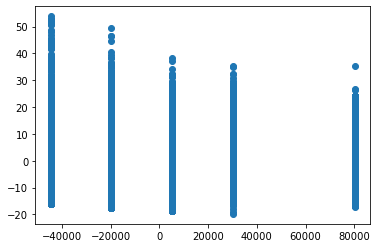

In [152]:
plt.scatter(PCA_df.PC1, PCA_df.PC2)

# Visualize with Color after KMeans Clustering

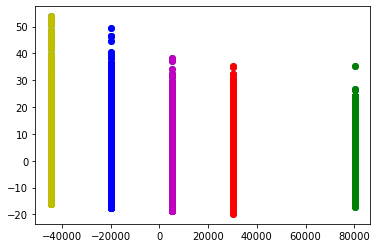

In [153]:
plt.scatter(PCA_df.PC1, PCA_df.PC2)

for color in np.unique(kmeans_res):
    plt.scatter(PCA_df.iloc[np.where(kmeans_res == color)[0], 0], 
                PCA_df.iloc[np.where(kmeans_res == color)[0], 1], 
                c = color)